In [ ]:

# import required variables
import pandas as pd
import numpy as np
# sklearn for ML models
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files, drive #import colab functionality
drive.mount("/content/drive") #mount the drive within our virtual machine

path = '/content/drive/MyDrive/MsciProject/6 Months Dundalk Turbine.csv' #identify the path to our dataset - remember to update to your details!
dundalkSample_df = pd.read_csv(path) #pd read csv as normal

Mounted at /content/drive


In [ ]:
#Loading Test set
path = '/content/drive/MyDrive/MsciProject/July 06 Dundalk Turbine.csv' #identify the path to our dataset - remember to update to your details!
test_df = pd.read_csv(path) #pd read csv as normal

## Load /Explore data

**Data: **First thing is to explore what data related to the problem is available. Then, we should be doing a lot of data preparation, exploration, and pre-processing before making it read a learning algorithm. But in this tutorial, we will keep it simple.

* First, we will load the file and view the first 10 rows
* Notice that  the file `Adevrtising.csv` must be inside the `data` folder, or simply change the line of code below, if hte path is different

In [ ]:
dundalkSample_df.head(10)

,Timestamps,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,...,RotorRPM,EnvirTemp,NacelTemp,GearOilTemp,GearBearTemp,GenTemp,GenPh1Temp,GenPh2Temp,GenPh3Temp,GenBearTemp
0,30/01/2006 20:30,9.5,0.7,101.9,2.0,527.3,633.2,362.3,48.8,0.0,...,26.1,5,18,55,63,999,82,82,81,62
1,30/01/2006 20:40,9.9,0.9,107.1,2.5,584.5,731.5,353.3,74.6,0.0,...,26.1,5,18,57,65,999,86,85,85,64
2,30/01/2006 20:50,9.3,0.9,105.0,-0.5,527.3,728.1,291.1,92.7,0.0,...,25.9,4,17,57,65,999,89,88,88,64
3,30/01/2006 21:00,8.7,0.8,106.3,0.8,428.0,669.4,216.7,92.9,0.0,...,25.5,4,15,55,63,999,88,88,88,60
4,30/01/2006 21:10,8.6,0.8,103.5,-2.0,434.7,622.2,233.1,80.3,0.0,...,25.4,4,15,57,66,999,85,85,84,57
5,30/01/2006 21:20,9.2,0.9,100.1,-1.8,497.9,652.9,280.9,71.4,0.0,...,25.9,4,15,57,65,999,84,84,83,54
6,30/01/2006 21:30,7.3,1.1,102.1,-3.1,256.7,440.9,87.6,81.0,0.0,...,22.5,4,15,55,63,999,81,81,79,53
7,30/01/2006 21:40,7.3,0.8,98.2,-4.5,255.6,372.8,138.0,52.0,0.0,...,22.2,4,15,57,65,999,77,77,75,51
8,30/01/2006 21:50,8.0,0.9,101.0,2.2,311.4,524.4,170.1,70.0,0.0,...,24.1,5,15,58,65,999,74,74,73,50
9,30/01/2006 22:00,8.0,0.7,97.2,1.7,323.3,472.7,212.1,58.7,0.0,...,24.2,5,16,55,63,999,73,73,72,53


In [ ]:
test_df.head(10)

,Timestamps,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,...,RotorRPM,EnvirTemp,NacelTemp,GearOilTemp,GearBearTemp,GenTemp,GenPh1Temp,GenPh2Temp,GenPh3Temp,GenBearTemp
0,01/07/2006,4.9,0.3,106.3,-2.1,68.3,79.4,51.4,5.9,9.6,...,16.1,15,27,54,60,999,70,70,75,62
1,01/07/2006 00:10,5.1,0.4,111.2,2.9,72.5,93.7,58.6,7.8,10.2,...,16.3,15,27,54,61,999,71,71,75,63
2,01/07/2006 00:20,5.2,0.4,107.7,-1.6,82.6,106.1,56.9,12.2,11.7,...,16.5,16,27,54,61,999,71,71,75,63
3,01/07/2006 00:30,5.1,0.3,106.8,-2.5,81.1,108.2,62.4,9.2,11.4,...,16.3,16,27,54,61,999,72,72,76,63
4,01/07/2006 00:40,5.4,0.4,108.4,-0.9,87.5,115.7,64.7,9.9,12.4,...,16.6,16,27,54,61,999,72,72,76,63
5,01/07/2006 00:50,5.6,0.4,114.0,4.7,92.4,129.2,64.3,14.2,13.1,...,17.3,16,27,54,61,999,73,73,76,64
6,01/07/2006 01:00,5.7,0.4,112.8,-0.2,109.9,162.2,67.5,27.6,15.5,...,17.5,16,28,54,61,999,73,73,77,64
7,01/07/2006 01:10,6.5,0.4,110.5,1.8,152.6,189.7,106.2,18.8,21.6,...,19.7,16,28,54,62,999,75,75,77,64
8,01/07/2006 01:20,5.4,0.6,112.7,-0.4,94.5,140.3,50.0,25.4,13.4,...,17.1,16,28,54,62,999,76,76,77,65
9,01/07/2006 01:30,4.8,0.3,111.8,-1.9,62.5,79.5,43.8,7.8,8.8,...,16.1,16,28,54,61,999,75,75,76,66


In [ ]:
# Check number of columns and rows
print(f'The dataset has {dundalkSample_df.shape[0]} rows and {dundalkSample_df.shape[1]} columns')

The dataset has 20477 rows and 22 columns


In [ ]:
# prepare the data
X = dundalkSample_df[['WindSpeed','WindDirAbs','WindDirRel','Pitch','GenRPM','RotorRPM','EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp', 'GenPh1Temp', 'GenPh2Temp','GenPh3Temp', 'GenBearTemp']]
y = dundalkSample_df['Power']
#
#y = dundalkSample_df['Power']


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)



LinearRegression()

In [ ]:
# print  the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs
sorted_coef_df = model_coeffs.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(sorted_coef_df)

Intercept: 
 106.31344617071008
Coefficients: 
 [ 2.85840224e+01  1.92070436e-02  1.68656696e-03 -2.28069105e+00
 -2.24529671e+00  1.43338587e+02  4.04992180e+00 -3.06634226e+00
  6.01090606e+00 -9.53384745e+00  1.66120863e+01 -6.33516320e+00
  6.73822521e-02 -1.10625736e+01]
              Coefficient
RotorRPM       143.338587
WindSpeed       28.584022
GenPh1Temp      16.612086
GearOilTemp      6.010906
EnvirTemp        4.049922
GenPh3Temp       0.067382
WindDirAbs       0.019207
WindDirRel       0.001687
GenRPM          -2.245297
Pitch           -2.280691
NacelTemp       -3.066342
GenPh2Temp      -6.335163
GearBearTemp    -9.533847
GenBearTemp    -11.062574


In [ ]:
# prediction with sklearn
WindSpeed = 3
WindDirAbs = 3.5
WindDirRel = -5.8
Pitch = 1.8
GenRPM = 1153
RotorRPM = 18.6
EnvirTemp = 15
NacelTemp = 28
GearOilTemp = 54
GearBearTemp = 59
GenPh1Temp = 80
GenPh2Temp = 80
GenPh3Temp = 83
GenBearTemp = 73
print(f'\n will generate {model.predict([[WindSpeed,WindDirAbs,WindDirRel,Pitch,GenRPM,RotorRPM,EnvirTemp, NacelTemp, GearOilTemp, GearBearTemp, GenPh1Temp, GenPh2Temp,GenPh3Temp, GenBearTemp]])}')




 will generate [22.4501923]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
test = test_df[['WindSpeed','WindDirAbs','WindDirRel','Pitch','GenRPM','RotorRPM','EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp', 'GenPh1Temp', 'GenPh2Temp','GenPh3Temp', 'GenBearTemp']]

* Lets predict sale values for all the dataset, and find the results

In [ ]:
print(test)

      WindSpeed  WindDirAbs  WindDirRel  Pitch  GenRPM  RotorRPM  EnvirTemp  \
0           4.9       106.3        -2.1   -1.3    1000      16.1         15   
1           5.1       111.2         2.9   -1.5    1010      16.3         15   
2           5.2       107.7        -1.6   -1.5    1021      16.5         16   
3           5.1       106.8        -2.5   -1.5    1008      16.3         16   
4           5.4       108.4        -0.9   -1.8    1032      16.6         16   
...         ...         ...         ...    ...     ...       ...        ...   
4335        4.0       264.6        -3.4   -0.4    1000      16.1         15   
4336        4.6       258.2        -4.6   -0.9    1003      16.2         15   
4337        5.5       258.6        -1.8   -1.7    1068      17.2         15   
4338        6.4       267.4         3.1   -1.8    1208      19.5         15   
4339        6.7       255.7        -5.0   -1.9    1273      20.5         15   

      NacelTemp  GearOilTemp  GearBearTemp  GenPh1T

In [ ]:
predictions = model.predict(test)
print(predictions)

[ 82.90714671  85.07788906  95.8808524  ... 106.09808379 154.45501514
 168.50262879]


In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

Mean Absolute Error: 36.98324424578823
Normalized Mean Absolute Error: 0.057053716104149874


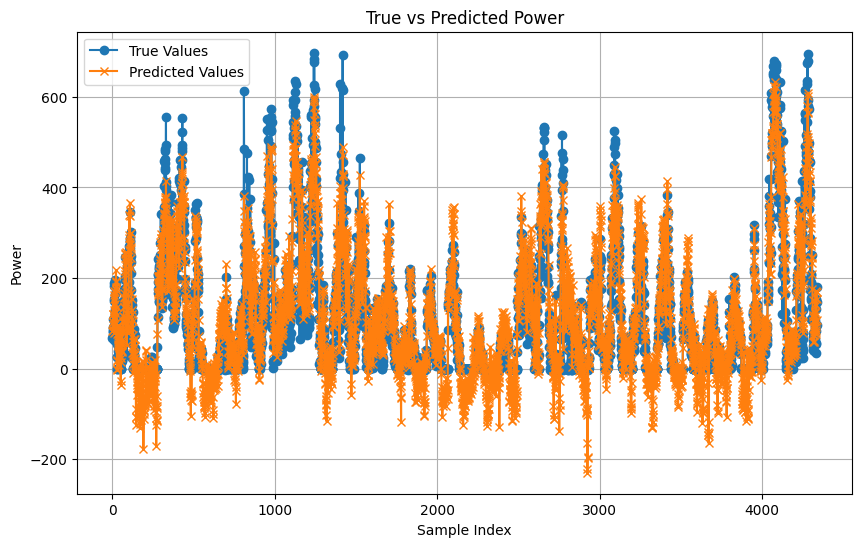

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
power_test_true = list(test_df['Power'])
power_test_pred = list(predictions)

mean_absolute_error(power_test_true, power_test_pred )
#min max normalisation and apply this normalisation to mae
# Calculate Mean Absolute Error
mae = mean_absolute_error(power_test_true, power_test_pred)
print(f'Mean Absolute Error: {mae}')

# Min-Max Normalization of MAE
# Assuming we want to normalize based on the range of the true values
min_value = min(power_test_true)
max_value = max(power_test_true)

# Normalized MAE
normalized_mae = (mae - min_value) / (max_value - min_value)
print(f'Normalized Mean Absolute Error: {normalized_mae}')

#line graph of each row predicted against actual power



#Flask


plt.figure(figsize=(10, 6))
plt.plot(power_test_true, label='True Values', marker='o')
plt.plot(power_test_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Power')
plt.xlabel('Sample Index')
plt.ylabel('Power')

plt.legend()
plt.grid()
plt.show()

#Dataset splits

#Different models


In [ ]:
print(power_test_pred)

[np.float64(82.90714670928796), np.float64(85.07788906013579), np.float64(95.88085240249868), np.float64(103.8690911939984), np.float64(102.27638992861077), np.float64(120.32305618245297), np.float64(119.63004586158135), np.float64(154.47981052081374), np.float64(112.66381511548772), np.float64(78.35001793074079), np.float64(110.89444269473356), np.float64(129.85163117386932), np.float64(163.04647234697958), np.float64(172.19294784204837), np.float64(169.20780590870876), np.float64(122.40100230959612), np.float64(142.24460741670677), np.float64(80.5308434478388), np.float64(113.54410038764419), np.float64(125.80590280317878), np.float64(176.0208455686803), np.float64(180.1440459825478), np.float64(217.49997233082806), np.float64(191.54116526497202), np.float64(172.9485412717813), np.float64(193.44914309678913), np.float64(136.24603183502379), np.float64(76.30256703977906), np.float64(19.548056896050838), np.float64(15.795531162714127), np.float64(-0.9250772521961892), np.float64(-4.267

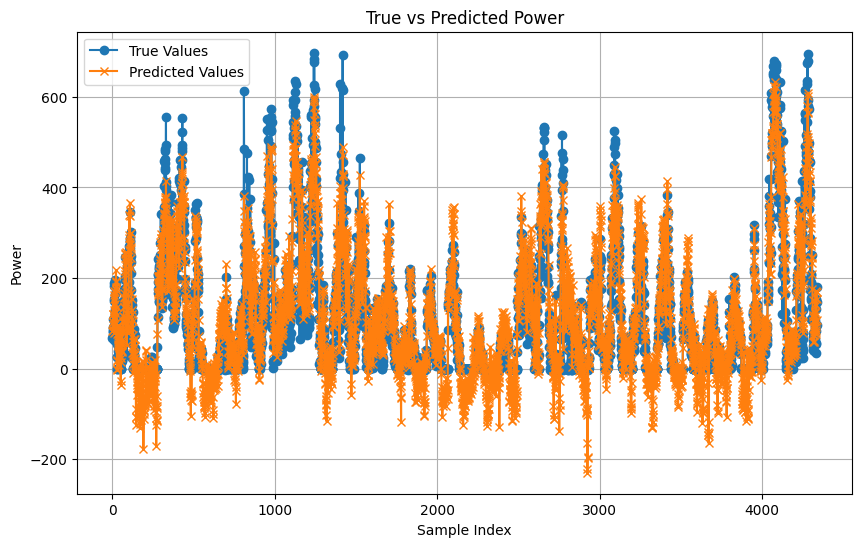

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(power_test_true, label='True Values', marker='o')
plt.plot(power_test_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Power')
plt.xlabel('Sample Index')
plt.ylabel('Power')

plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")




mlp_path = '/content/drive/MyDrive/MsciProject/6 Months Dundalk Turbine.csv' #identify the path to our dataset - remember to update to your details!
mlp_dundalkSample_df = pd.read_csv(mlp_path) #pd read csv as normal


#Loading Test set
mlp_test_path = '/content/drive/MyDrive/MsciProject/July 06 Dundalk Turbine.csv' #identify the path to our dataset - remember to update to your details!
mlp_test_df = pd.read_csv(mlp_test_path) #pd read csv as normal


mlp_X = dundalkSample_df[['WindSpeed','WindDirAbs','WindDirRel','Pitch','GenRPM','RotorRPM','EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp', 'GenPh1Temp', 'GenPh2Temp','GenPh3Temp', 'GenBearTemp']]
mlp_y = dundalkSample_df['Power']




mlp_model = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
mlp_model.fit(mlp_X, mlp_y)



# print  the coefficients
mlp_model.score(mlp_X, mlp_y)

#

# Extract the first-layer weights (input to first hidden layer)
weights = mlp_model.coefs_[0]

# Compute the absolute sum of weights for each feature
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame(feature_importance, index=mlp_X.columns, columns=['Importance'])

# Sort by importance
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(sorted_importance_df)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              Importance
WindSpeed     185.965402
Pitch          91.430061
GearOilTemp    39.758722
GearBearTemp   37.236481
EnvirTemp      34.190663
NacelTemp      33.615944
WindDirRel     30.260537
GenBearTemp    26.146799
GenPh1Temp     22.947203
GenPh2Temp     22.783372
GenPh3Temp     21.638660
WindDirAbs     13.121697
RotorRPM       11.110939
GenRPM         10.422441


In [ ]:
# prediction with sklearn
WindSpeed = 3
WindDirAbs = 3.5
WindDirRel = -5.8
Pitch = 1.8
GenRPM = 1153
RotorRPM = 18.6
EnvirTemp = 15
NacelTemp = 28
GearOilTemp = 54
GearBearTemp = 59
GenPh1Temp = 80
GenPh2Temp = 80
GenPh3Temp = 83
GenBearTemp = 73
print(f'\n will generate {mlp_model.predict([[WindSpeed,WindDirAbs,WindDirRel,Pitch,GenRPM,RotorRPM,EnvirTemp, NacelTemp, GearOilTemp, GearBearTemp, GenPh1Temp, GenPh2Temp,GenPh3Temp, GenBearTemp]])}')




 will generate [6.01715024]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(model, f)

[ 61.35924092  65.29875274  70.92328428 ...  92.9391657  144.64209927
 169.66311707]
Mean Absolute Error: 11.134153177828091
Normalized Mean Absolute Error: 0.02016859757110173


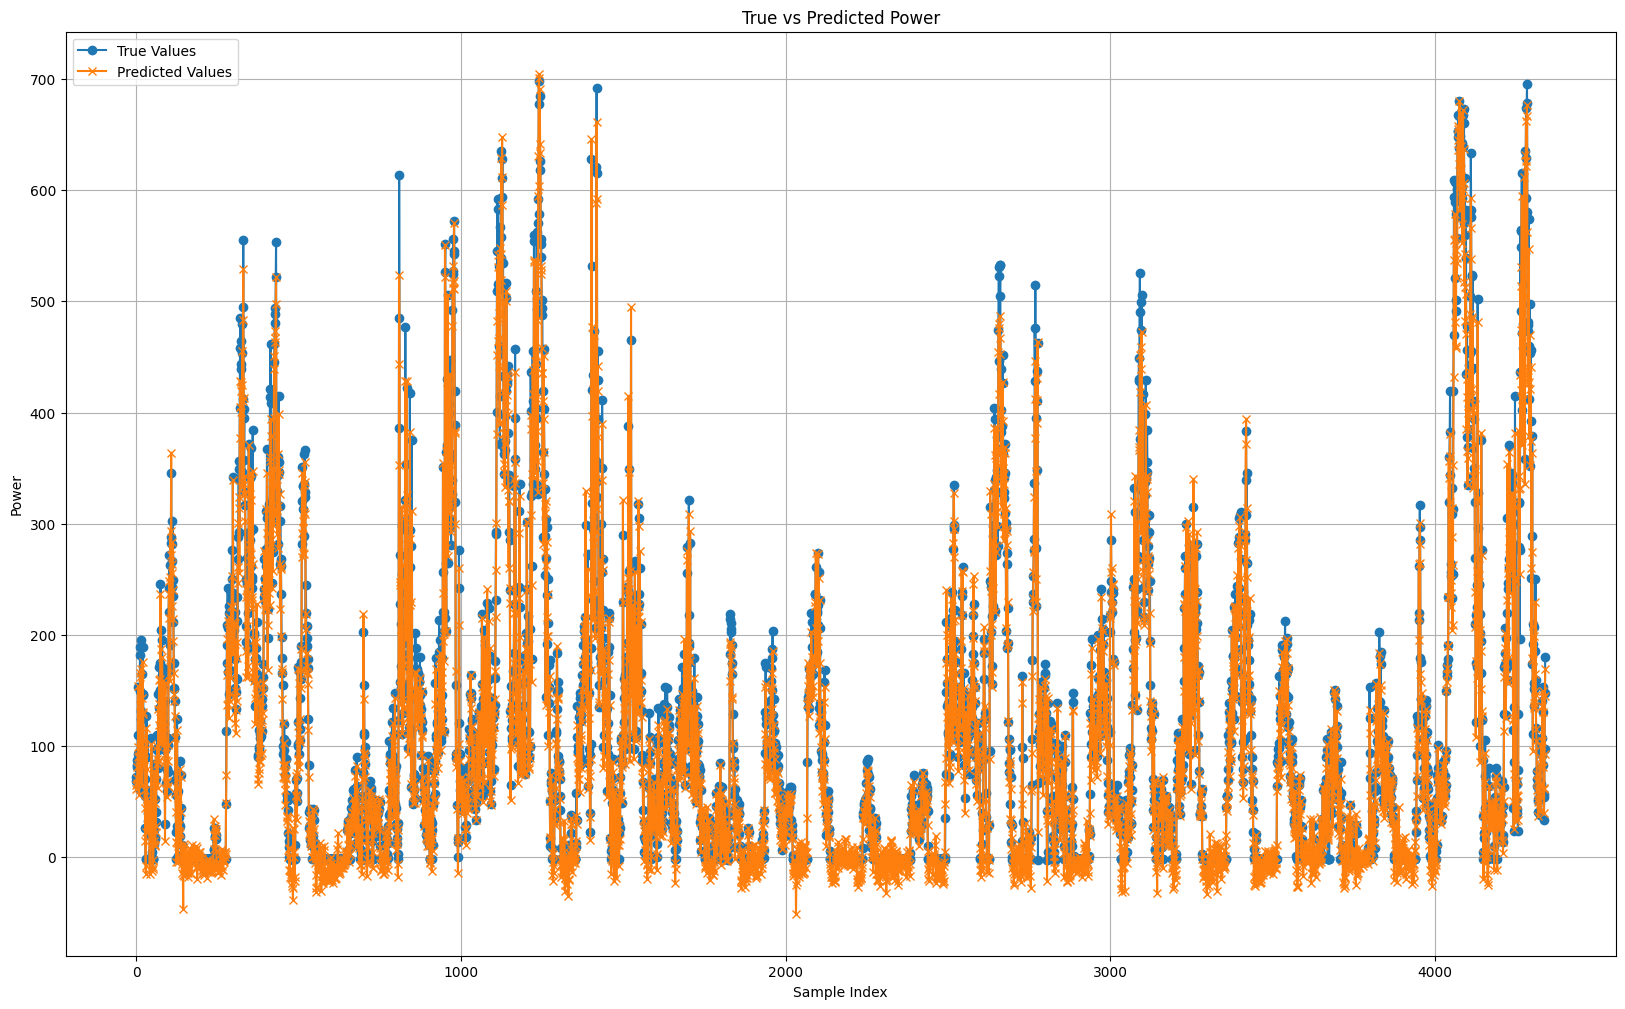

In [ ]:
mlp_test = mlp_test_df[['WindSpeed','WindDirAbs','WindDirRel','Pitch','GenRPM','RotorRPM','EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp', 'GenPh1Temp', 'GenPh2Temp','GenPh3Temp', 'GenBearTemp']]

mlp_predictions = mlp_model.predict(mlp_test)
print(mlp_predictions)


from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
mlp_power_test_true = list(mlp_test_df['Power'])
mlp_power_test_pred = list(mlp_predictions)

mean_absolute_error(mlp_power_test_true, mlp_power_test_pred )
#min max normalisation and apply this normalisation to mae
# Calculate Mean Absolute Error
mlp_mae = mean_absolute_error(mlp_power_test_true, mlp_power_test_pred)
print(f'Mean Absolute Error: {mlp_mae}')

# Min-Max Normalization of MAE
# Assuming we want to normalize based on the range of the true values
mlp_min_value = min(mlp_power_test_true)
mlp_max_value = max(mlp_power_test_true)

# Normalized MAE
mlp_normalized_mae = (mlp_mae - mlp_min_value) / (mlp_max_value - mlp_min_value)
print(f'Normalized Mean Absolute Error: {mlp_normalized_mae}')

#line graph of each row predicted against actual power



#Flask


plt.figure(figsize=(20, 12))
plt.plot(mlp_power_test_true, label='True Values', marker='o')
plt.plot(mlp_power_test_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Power')
plt.xlabel('Sample Index')
plt.ylabel('Power')

plt.legend()
plt.grid()
plt.show()






In [ ]:
! pip install lime
! pip install shap
! pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=927c741362e772250a56b12313d0d4a9503182cd033b433cda3a2a6a3a2b0590
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.5 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Score: 0.9978213077598406
              Importance
Pitch         329.325406
GenRPM        167.088671
RotorRPM      167.015474
WindDirAbs    130.045175
WindSpeed     127.470086
WindDirRel    124.938377
GearBearTemp   93.514910
GearOilTemp    63.144839
NacelTemp      51.307837
GenBearTemp    50.424545
GenPh3Temp     48.494832
GenPh1Temp     44.046469
GenPh2Temp     41.665962
EnvirTemp      39.115634

Predicted Power: [22.67555743]
[ 68.01043559  75.45893319  82.73446137 ...  99.39739402 152.42110905
 182.63473152]
Mean Absolute Error: 6.92462638499666
Normalized Mean Absolute Error: 0.014161852718317153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


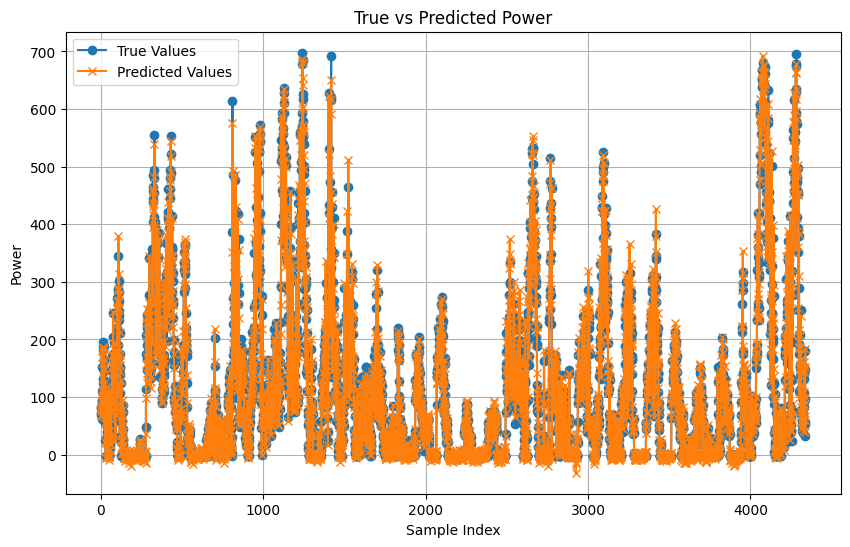

[-0.29111774 -0.62415166  0.1669126  -0.29015832 -0.14298602 -0.14432157
  1.14100812  1.16643328  0.28512974  0.34177257  0.16159068  0.16008571
  0.12151765  0.56952534]
<bound method MLPRegressor.predict of MLPRegressor(learning_rate='adaptive', max_iter=5000, random_state=1, tol=0.01)>
Local Contributions:
-0.90 < WindSpeed <= -0.00: 44.6892
-0.33 < Pitch <= -0.28: 27.7589
0.24 < GearBearTemp <= 0.54: 19.0648
0.18 < GenBearTemp <= 0.72: 12.7493
-0.17 < GenRPM <= 0.10: 12.2192
WindDirRel > 0.11: 10.5335
EnvirTemp > 0.67: 5.7090
-0.57 < GenPh1Temp <= 0.27: 4.1598
NacelTemp > 0.72: 4.0450
-0.07 < GearOilTemp <= 0.29: 2.7150
-0.54 < GenPh3Temp <= 0.23: 2.4149
-0.56 < GenPh2Temp <= 0.26: 1.7897
-0.75 < WindDirAbs <= 0.21: 1.6944
-0.17 < RotorRPM <= 0.10: 1.3539


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import drive

from lime.lime_tabular import LimeTabularExplainer
# Mount Google Drive
drive.mount("/content/drive")

mlp_path = '/content/drive/MyDrive/MsciProject/6 Months Dundalk Turbine.csv'  # Path to dataset
mlp_dundalkSample_df = pd.read_csv(mlp_path)  # Read CSV

# Loading Test set
mlp_test_path = '/content/drive/MyDrive/MsciProject/July 06 Dundalk Turbine.csv'  # Path to test dataset
mlp_test_df = pd.read_csv(mlp_test_path)  # Read CSV

# Define features and target variable
mlp_X = mlp_dundalkSample_df[['WindSpeed', 'WindDirAbs', 'WindDirRel', 'Pitch', 'GenRPM', 'RotorRPM',
                               'EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp',
                               'GenPh1Temp', 'GenPh2Temp', 'GenPh3Temp', 'GenBearTemp']]
mlp_y = mlp_dundalkSample_df['Power']

# Feature Scaling
scaler = StandardScaler()
mlp_X_scaled = scaler.fit_transform(mlp_X)

# Train the MLP model
mlp_model = MLPRegressor(random_state=1, max_iter=5000, tol=0.01,learning_rate='adaptive')
mlp_model.fit(mlp_X_scaled, mlp_y)

# Print model score
print(f'Model Score: {mlp_model.score(mlp_X_scaled, mlp_y)}')

# Extract the first-layer weights (input to first hidden layer)
weights = mlp_model.coefs_[0]

# Compute the absolute sum of weights for each feature
feature_importance = np.sum(np.abs(weights), axis=1)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame(feature_importance, index=mlp_X.columns, columns=['Importance'])

# Sort by importance
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(sorted_importance_df)

# Prediction example
sample_input = [[3, 3.5, -5.8, 1.8, 1153, 18.6, 15, 28, 54, 59, 80, 80, 83, 73]]
print(f'\nPredicted Power: {mlp_model.predict(scaler.transform(sample_input))}')

# Prepare the test set
mlp_test = mlp_test_df[['WindSpeed', 'WindDirAbs', 'WindDirRel', 'Pitch', 'GenRPM', 'RotorRPM',
                         'EnvirTemp', 'NacelTemp', 'GearOilTemp', 'GearBearTemp',
                         'GenPh1Temp', 'GenPh2Temp', 'GenPh3Temp', 'GenBearTemp']]

# Scale the test set
mlp_test_scaled = scaler.transform(mlp_test)

# Make predictions with the scaled test set
mlp_predictions = mlp_model.predict(mlp_test_scaled)
print(mlp_predictions)
import pickle
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Calculate Mean Absolute Error
mlp_power_test_true = list(mlp_test_df['Power'])
mlp_power_test_pred = list(mlp_predictions)
mlp_mae = mean_absolute_error(mlp_power_test_true, mlp_power_test_pred)
print(f'Mean Absolute Error: {mlp_mae}')

# Min-Max Normalization of MAE
mlp_min_value = min(mlp_power_test_true)
mlp_max_value = max(mlp_power_test_true)

# Normalized MAE
mlp_normalized_mae = (mlp_mae - mlp_min_value) / (mlp_max_value - mlp_min_value)
print(f'Normalized Mean Absolute Error: {mlp_normalized_mae}')

# Line graph of each row predicted against actual power
plt.figure(figsize=(10, 6))
plt.plot(mlp_power_test_true, label='True Values', marker='o')
plt.plot(mlp_power_test_pred, label='Predicted Values', marker='x')
plt.title('True vs Predicted Power')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid()
plt.show()

import dill
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(training_data=mlp_X_scaled,
                                   feature_names=mlp_X.columns,
                                   mode='regression')

# Save the explainer using dill
with open('lime_explainer_MLP.dill', 'wb') as f:
    dill.dump(explainer, f)

i = 27  # Index of the instance you want to explain
# Choose an instance to explain
# print(mlp_test_scaled)
print(mlp_test_scaled[i])
print(mlp_model.predict)


exp = explainer.explain_instance(data_row=mlp_test_scaled[i],
                                  predict_fn=mlp_model.predict,
                                  num_features=len(mlp_test_df.columns))

# Get contributions as a list
local_contributions = exp.as_list()

# Print the contributions
print("Local Contributions:")
for feature, contribution in local_contributions:
    print(f"{feature}: {abs(contribution):.4f}")



# import shap
# explainerShap = shap.KernelExplainer(model=mlp_model.predict, data=mlp_X_scaled, link="identity")
# shap_values = explainerShap.shap_values(mlp_test_scaled[i], nsamples=100)
# shap.initjs()
# shap.force_plot(explainerShap.expected_value, shap_values, mlp_test_scaled[i])
# # Get the feature names
# feature_names = mlp_X.columns

# # Print local contributions
# print("Local Contributions:")
# for feature, value in zip(feature_names, shap_values):
#     print(f"{feature}: {abs(value):.4f}")
# # # Alternatively, use summary plot for all test instances
# # shap.summary_plot(shap_values, mlp_test_scaled)